In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
# Load and Explore the Crime Data
crime_data = pd.read_csv('crime_data_bangladesh.csv')

In [ ]:
# Display basic information about the dataset
print(crime_data.head())
print(crime_data.info())
print(crime_data.describe())

                 area_name  year  dacoity  robbery   woman_child_Repression  \
0       dhaka metropolitan  2010     47.0     220.0                   245.0   
1  chittagong metropolitan  2010     16.0     108.0                    94.0   
2      khulna metropolitan  2010      3.0       9.0                    29.0   
3    rajshahi metropolitan  2010      4.0      20.0                    21.0   
4     barisal metropolitan  2010      8.0      12.0                    19.0   

   speedy_trial  riot   murder  kidnapping  police_assault  burglary   theft  \
0         363.0    3.0  1370.0       139.0           155.0     555.0  1915.0   
1          31.0    7.0   455.0        37.0            31.0     123.0   314.0   
2          25.0    NaN   153.0        11.0             4.0      65.0    91.0   
3           9.0   15.0   157.0         9.0            12.0      53.0   106.0   
4          21.0    NaN   112.0         6.0             8.0      24.0    83.0   

   other_cases  recovery_cases_arms_act  rec

In [ ]:
# Data Preprocessing
# Check for missing values
print(crime_data.isnull().sum())


area_name                    0
year                         0
dacoity                     28
robbery                     21
woman_child_Repression      22
speedy_trial                 7
riot                        39
murder                       2
kidnapping                   9
police_assault               9
burglary                     6
theft                        3
other_cases                 10
recovery_cases_arms_act      8
recovery_cases_explosive    23
recovery_cases_narcotics     9
recovery_cases_smuggling     8
dtype: int64


In [ ]:
crime_data = crime_data.fillna(0)
print(crime_data.isnull().sum())

area_name                   0
year                        0
dacoity                     0
robbery                     0
woman_child_Repression      0
speedy_trial                0
riot                        0
murder                      0
kidnapping                  0
police_assault              0
burglary                    0
theft                       0
other_cases                 0
recovery_cases_arms_act     0
recovery_cases_explosive    0
recovery_cases_narcotics    0
recovery_cases_smuggling    0
dtype: int64


In [ ]:

crime_data.describe()

,year,dacoity,robbery,woman_child_Repression,speedy_trial,riot,murder,kidnapping,police_assault,burglary,theft,other_cases,recovery_cases_arms_act,recovery_cases_explosive,recovery_cases_narcotics,recovery_cases_smuggling
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.892523,25.635514,48.976636,169.668224,80.995327,31.093458,1205.789720,57.186916,107.869159,120.570093,331.990654,3638.556075,113.154206,44.920561,2380.098131,283.686916
std,4.007345,38.104352,74.235094,274.432949,109.804200,122.488825,1576.974457,123.026516,722.474674,178.279525,484.084238,5370.159187,168.424596,89.042893,3974.907296,503.059914
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.250000,3.000000,8.000000,9.250000,5.000000,0.000000,120.000000,4.000000,5.000000,6.000000,36.500000,88.500000,12.000000,2.000000,39.500000,10.000000
50%,2017.000000,8.000000,21.000000,33.000000,32.000000,3.000000,410.000000,19.500000,16.000000,41.500000,98.500000,560.500000,27.000000,10.000000,495.500000,74.000000
75%,2020.000000,33.750000,61.000000,243.500000,113.500000,17.000000,1863.250000,65.000000,49.250000,136.250000,435.750000,6196.750000,162.250000,53.000000,2659.000000,223.750000
max,2023.000000,184.000000,472.000000,1395.000000,563.000000,1290.000000,8917.000000,1111.000000,8917.000000,852.000000,2240.000000,22429.000000,891.000000,642.000000,22682.000000,2509.000000


In [ ]:
# Sob gulo crime ekhane input dilam jeguloke clustering korte chacchi
selected_features = ['dacoity', 'robbery ', 'woman_child_Repression', 'riot ', 'murder', 'kidnapping', 'police_assault', 'burglary', 'theft', 'other_cases', 'recovery_cases_arms_act', 'recovery_cases_explosive', 'recovery_cases_smuggling']
X = crime_data[selected_features]

#important for K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
# choose the optimal number of clusters
optimal_k = 10

# K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
crime_data['Cluster'] = kmeans.labels_

# To access the cluster centers and labels:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

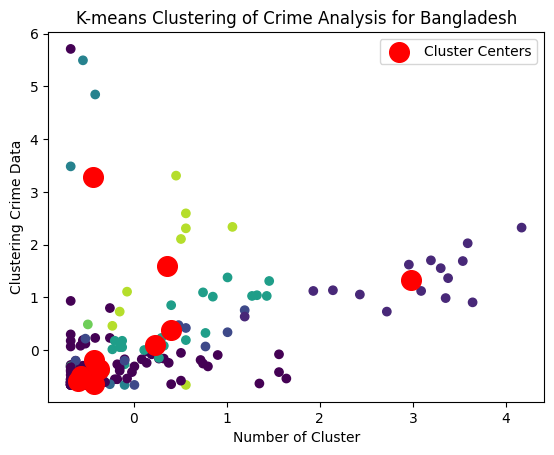

In [ ]:
# Perform K-means clustering without level name and color
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')
plt.title('K-means Clustering of Crime Analysis for Bangladesh')
plt.xlabel('Number of Cluster')
plt.ylabel('Clustering Crime Data')
plt.legend()
plt.show()

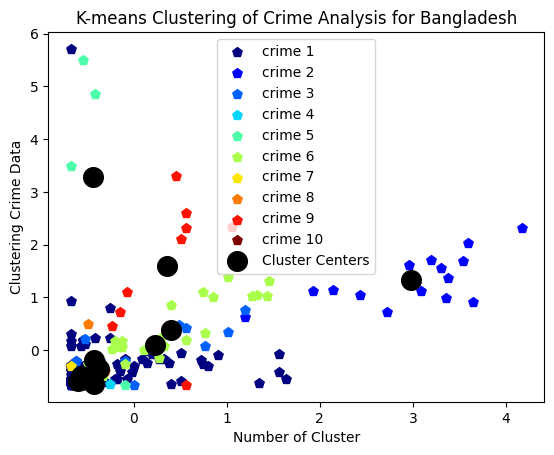

In [ ]:
# Perform K-means clustering with level name and color
level_names = [f'crime {i+1}' for i in range(optimal_k)]
colors = plt.cm.jet(np.linspace(0, 1, optimal_k))

# visualize the clusters with level names and custom colors
for cluster_num in range(optimal_k):
    cluster_data = X_scaled[kmeans.labels_ == cluster_num]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=level_names[cluster_num], c=[colors[cluster_num]],marker='p', s=50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Cluster Centers')
plt.title('K-means Clustering of Crime Analysis for Bangladesh')
plt.xlabel('Number of Cluster')
plt.ylabel('Clustering Crime Data')
plt.legend()
plt.show()

In [ ]:
# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[-0.36972283 -0.36755144 -0.4138616  -0.14165233 -0.4609921  -0.26970296
  -0.12008368 -0.40671488 -0.43073778 -0.45727041 -0.4755232  -0.31744702
  -0.40421506]
 [ 2.97331321  1.33074231  2.85667453 -0.14587934  1.87968218  0.67145131
   0.04624244  2.04144539  1.89903534  2.46562833  1.22346229  0.11121161
   0.49170757]
 [ 0.23318256  0.08808044  0.22035705 -0.18979559  0.13462926 -0.04144507
  -0.04254968  0.21606526  0.02797245  0.32756174  2.75869835  0.20351798
  -0.20041899]
 [-0.42883301 -0.63879349 -0.59778526  0.18472    -0.22762749  7.11386201
  -0.04328962 -0.64602392 -0.67844714 -0.6460401   0.10422184  3.82823154
  -0.28231056]
 [-0.43102511  3.29150161 -0.39872832  2.9144831   4.11191089 -0.19706017
  -0.14271829 -0.61182147 -0.6703373  -0.67461323  1.2741475  -0.35932574
  -0.06662291]
 [ 0.40416671  0.38659873  0.86604156 -0.2145941   0.77325953  0.13556577
  -0.09488395  0.44609151  0.61579769  1.28445968  0.44413574  0.22847887
   2.52745477]
 [-0.

In [ ]:
# Print the number of data points in each cluster
print("Number of data points in each cluster:")
print(pd.Series(cluster_labels).value_counts())


Number of data points in each cluster:
0    143
5     23
1     15
2     10
8      9
4      4
3      3
7      3
6      2
9      2
dtype: int64


In [ ]:
# Crime trend analysis over the years
crime_yearly = crime_data.groupby('year')['murder'].sum()

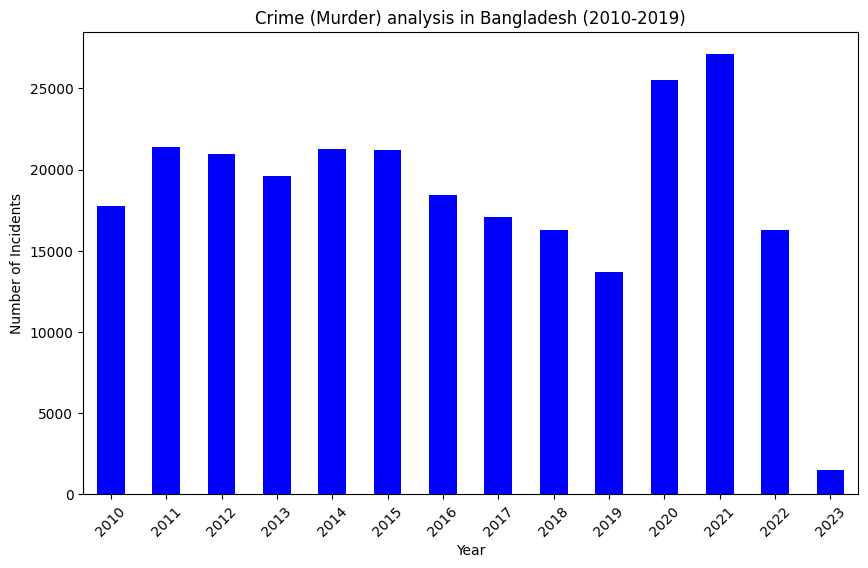

In [ ]:
plt.figure(figsize=(10, 6))
crime_yearly.plot(kind='bar', color='blue')
plt.title('Crime (Murder) analysis in Bangladesh (2010-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Crime analysis for which location are more
crime_by_location = crime_data.groupby('area_name')['murder'].sum().sort_values(ascending=False)[:10]

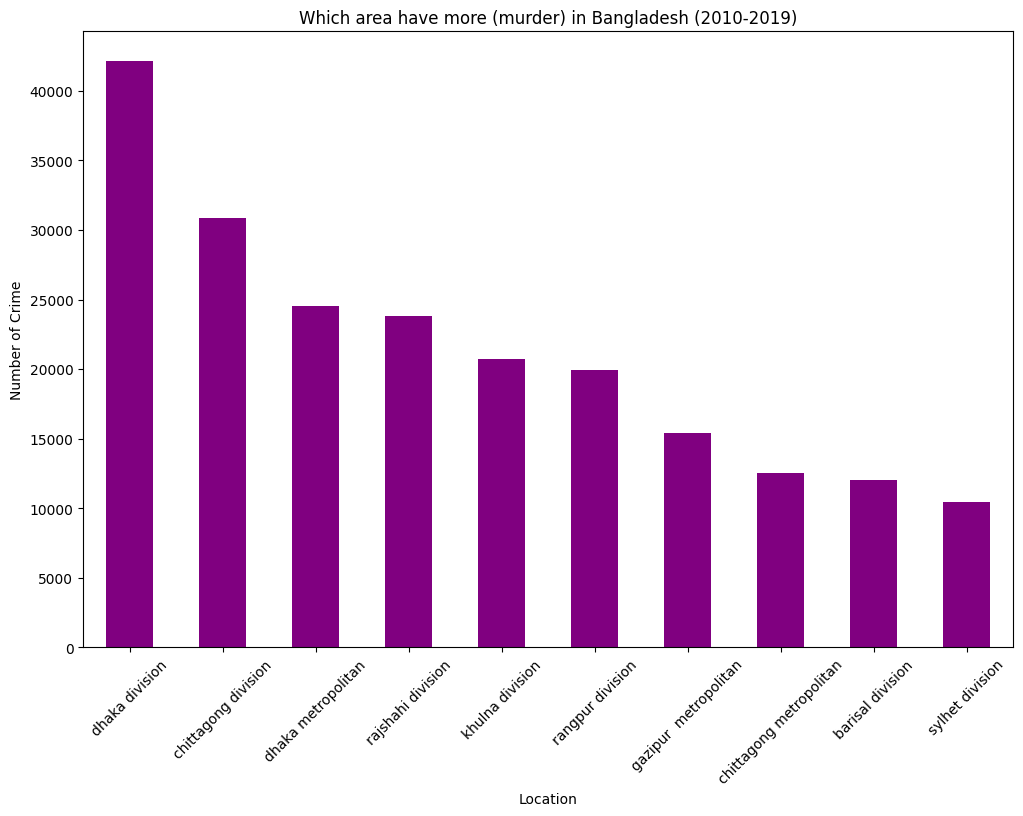

In [ ]:
plt.figure(figsize=(12, 8))
crime_by_location.plot(kind='bar', color='purple')
plt.title('Which area have more (murder) in Bangladesh (2010-2019)')
plt.xlabel('Location')
plt.ylabel('Number of Crime')
plt.xticks(rotation=45)
plt.show()


In [ ]:
def plot_treemap(col):
    fig = px.treemap(crime_data, path=['area_name'], values=col, height=400,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()


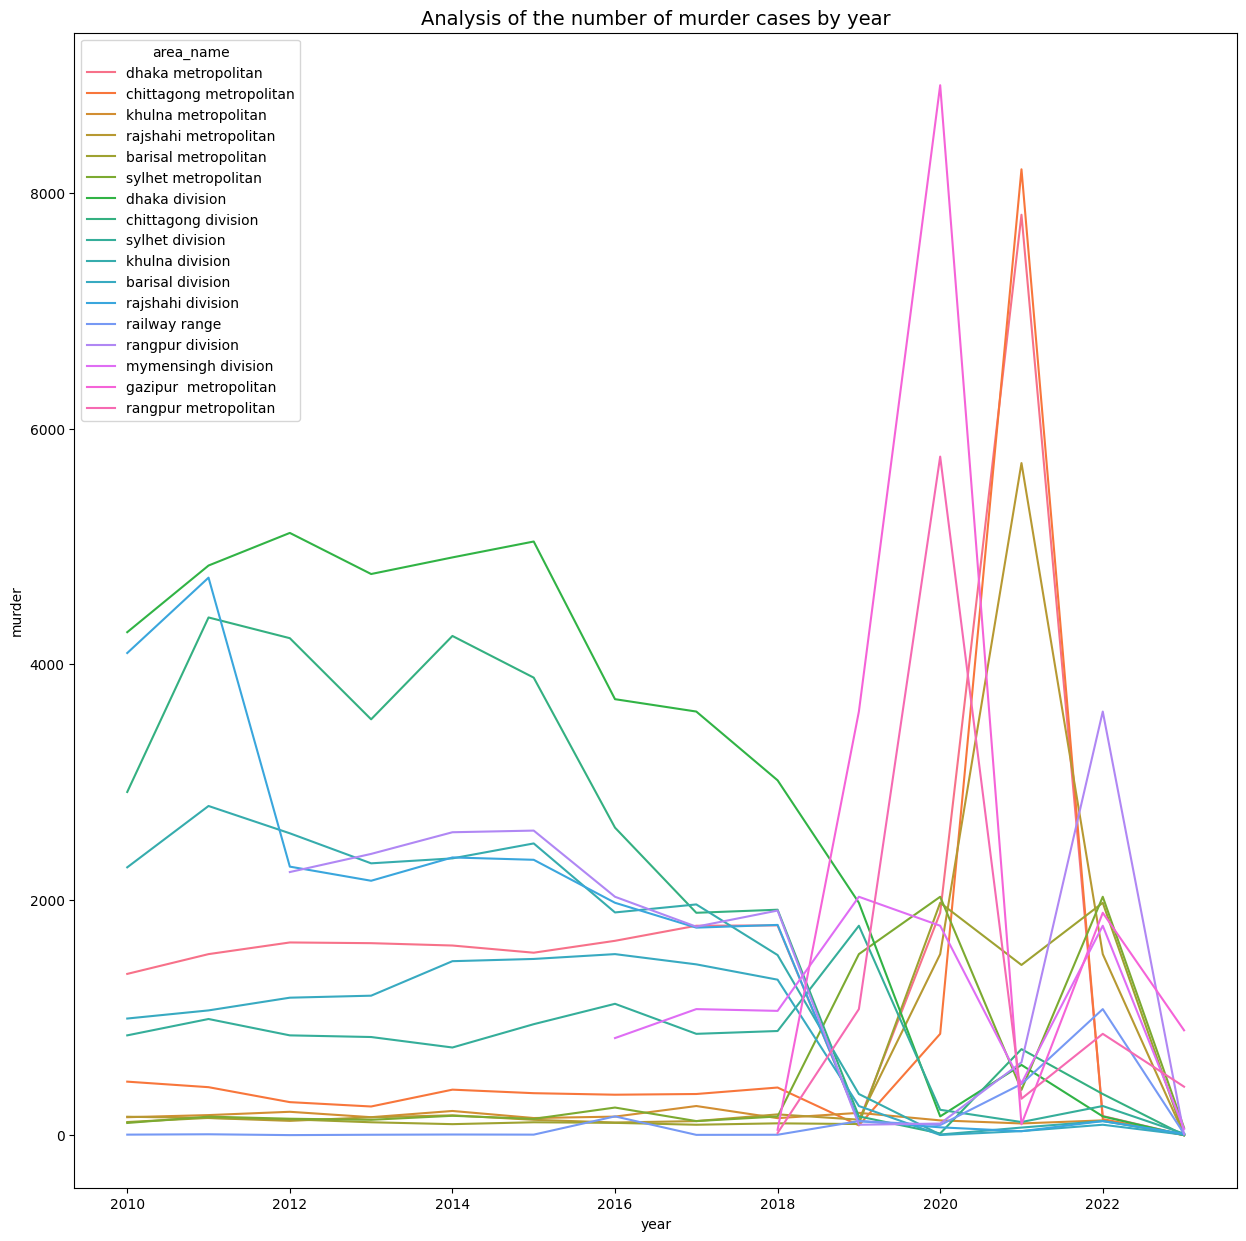

In [ ]:
    plt.figure(figsize=(15,15))
    sns.set_palette('pastel')
    plt.title('Analysis of the number of murder cases by year',fontsize=14)
    sns.lineplot(x = 'year', y = 'murder', data = crime_data, hue='area_name')
    plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
# For Dhaka Division
dhaka_murders = crime_data[(crime_data['murder'] == 'Murder') & (crime_data['area_name'] == 'Dhaka')]
dhaka_map = folium.Map(location=[23.6850, 90.3563], zoom_start=10)
marker_cluster = MarkerCluster().add_to(dhaka_map)

for index, row in dhaka_murders.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Location: {row['Location']}<br>Incidents: {row['Number of Incidents']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)


In [ ]:
dhaka_map

In [ ]:
dhaka_map.save('dhaka_murder_hotspots_map.html')

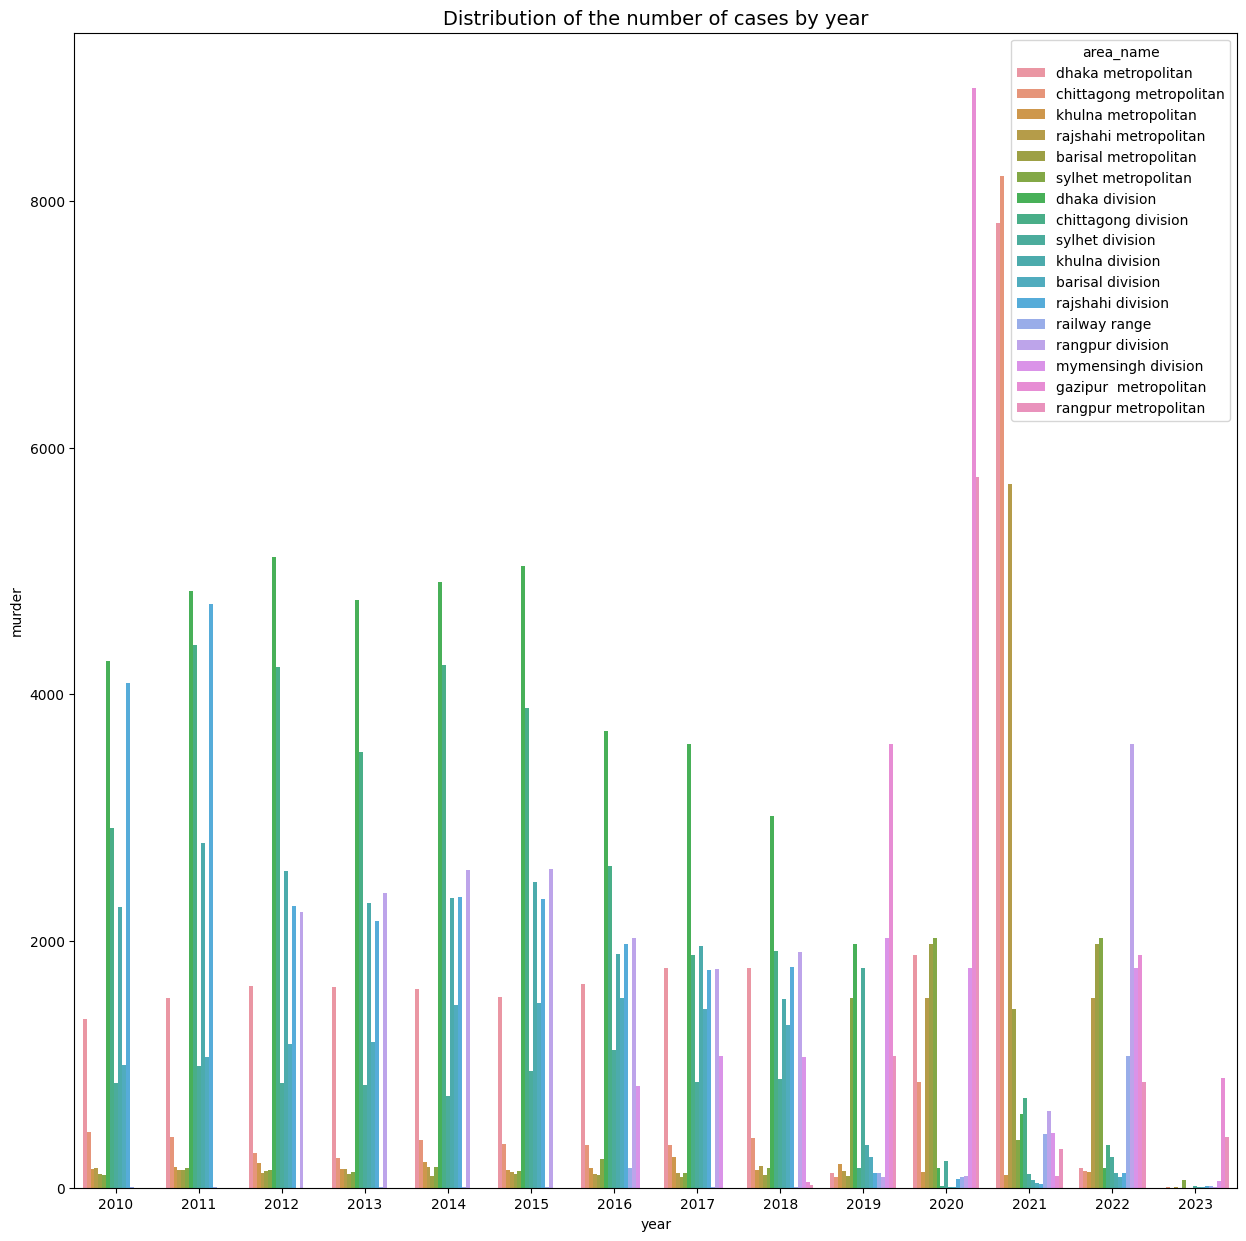

In [ ]:
plt.figure(figsize=(15,15))
sns.set_palette('pastel')
plt.title('Distribution of the number of cases by year',fontsize=14)
sns.barplot(x = 'year', y = 'murder', data = crime_data, hue='area_name')
plt.show()

In [ ]:
# total number of crime by division wise and year in  table
pivot_table = crime_data.pivot_table(index='area_name', columns='year', values='murder', aggfunc='sum', fill_value=0)
# Round the values to integers
pivot_table = pivot_table.astype(int)

print(pivot_table)


year                     2010  2011  2012  2013  2014  2015  2016  2017  2018  \
area_name                                                                       
barisal division          991  1060  1168  1185  1478  1497  1538  1451  1321   
barisal metropolitan      112   147   135   110    94   110   105    89   101   
chittagong division      2915  4397  4221  3532  4240  3886  2612  1889  1915   
chittagong metropolitan   455   408   281   244   387   357   344   350   405   
dhaka division           4272  4838  5115  4766  4907  5042  3703  3598  3014   
dhaka metropolitan       1370  1538  1637  1631  1611  1550  1651  1779  1782   
gazipur  metropolitan       0     0     0     0     0     0     0     0    46   
khulna division          2275  2796  2564  2309  2351  2478  1892  1960  1530   
khulna metropolitan       153   171   199   153   206   146   158   248   145   
mymensingh division         0     0     0     0     0     0   825  1071  1056   
railway range               

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [ ]:
def plot_treemap(col):
    fig = px.treemap(df, path=['area_name'], values=col, height=700,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

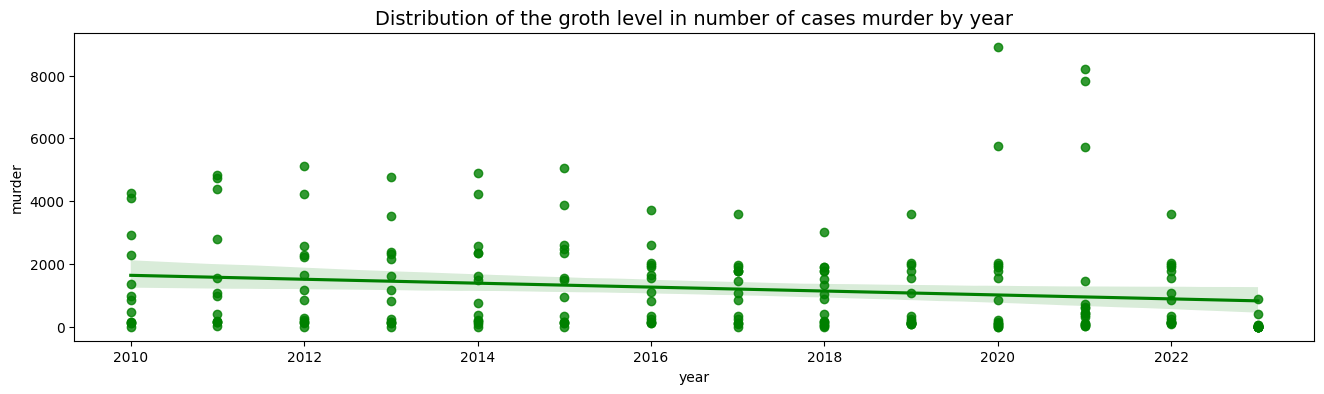

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the groth level in number of cases murder by year', fontsize=14)
sns.regplot(x='year', y='murder', data=crime_data, color='green')
plt.show()

In [ ]:
df= crime_data

In [ ]:
import plotly.express as px
plot_treemap('murder')


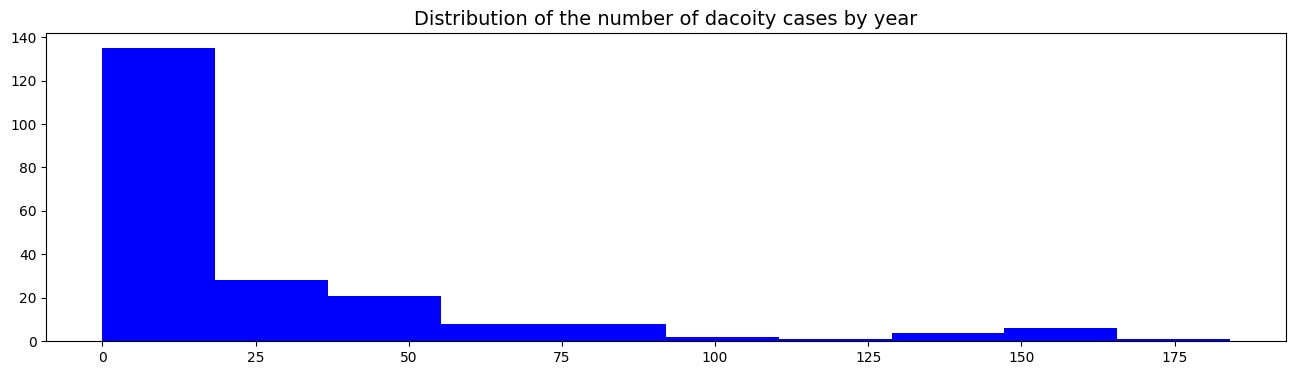

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the number of dacoity cases by year', fontsize=14)
plt.hist(crime_data.dacoity, color='blue')
plt.show()

In [ ]:
import plotly.express as px
plot_treemap('dacoity')


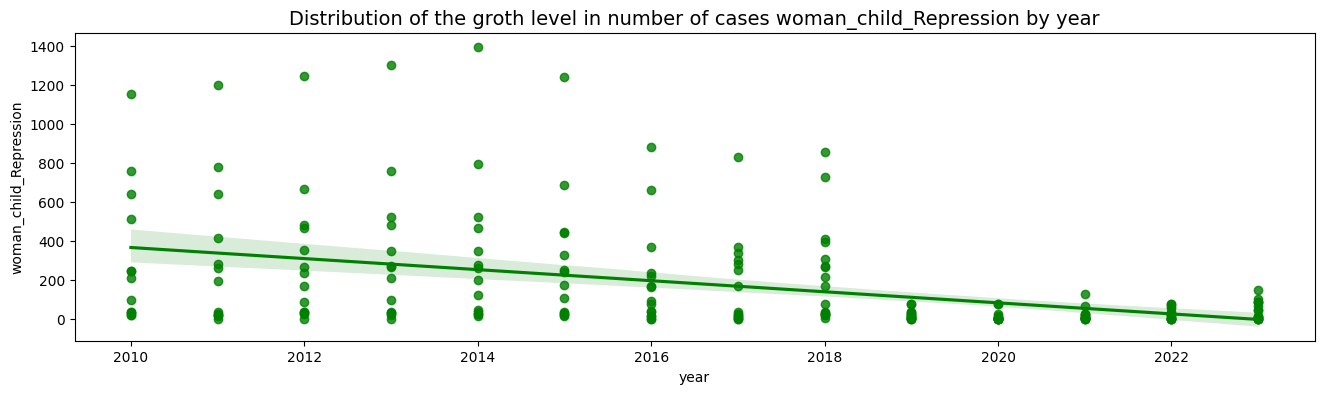

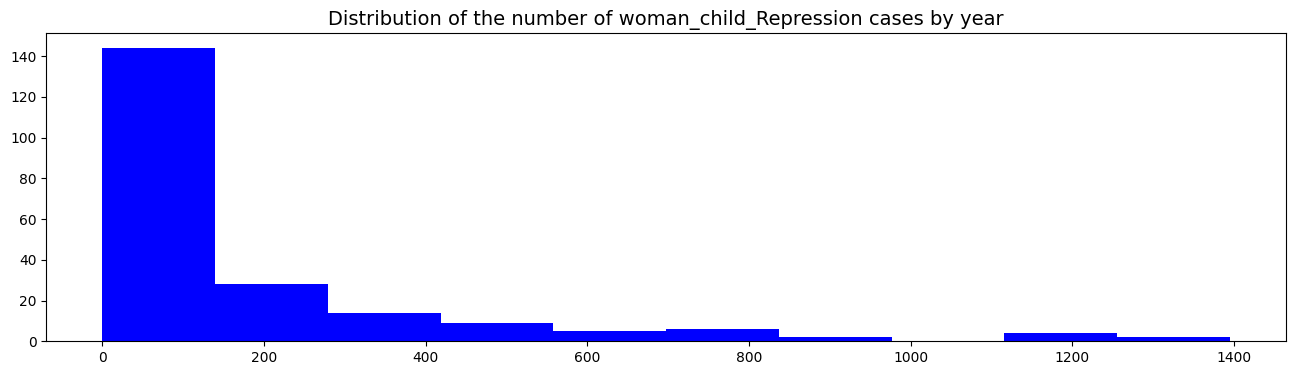

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the groth level in number of cases woman_child_Repression by year', fontsize=14)
sns.regplot(x='year', y='woman_child_Repression', data=crime_data, color='green')
plt.show()

plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the number of woman_child_Repression cases by year', fontsize=14)
plt.hist(crime_data.woman_child_Repression, color='blue')
plt.show()

In [ ]:
import plotly.express as px
plot_treemap('woman_child_Repression')


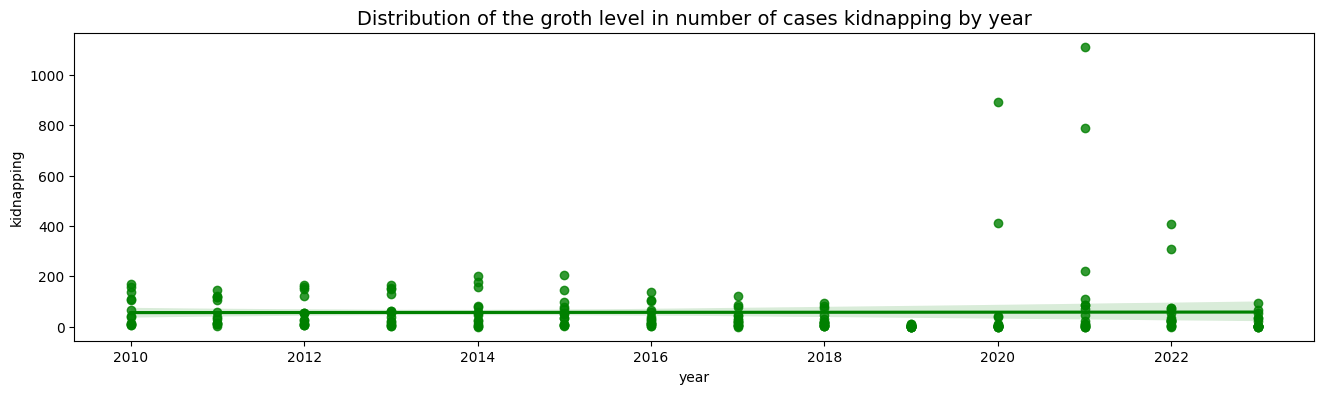

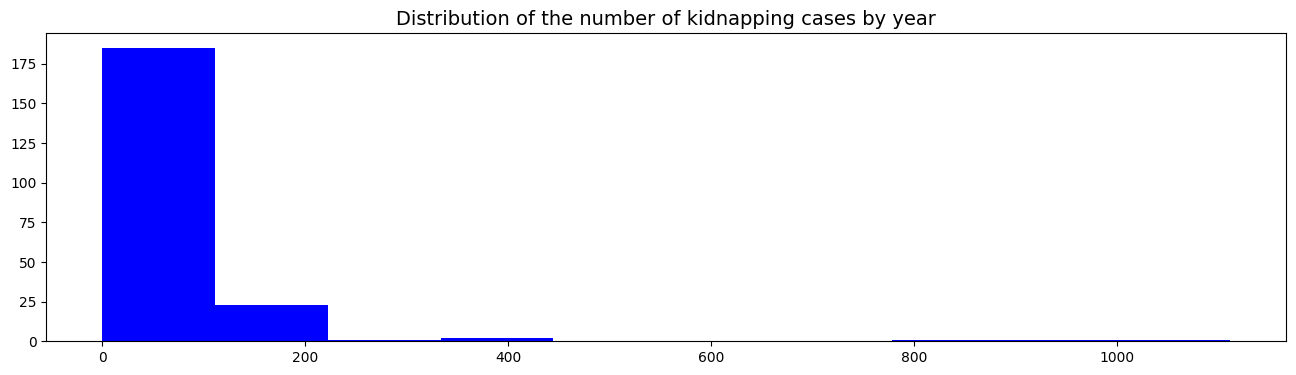

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the groth level in number of cases kidnapping by year', fontsize=14)
sns.regplot(x='year', y='kidnapping', data=crime_data, color='green')
plt.show()

plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the number of kidnapping cases by year', fontsize=14)
plt.hist(crime_data.kidnapping, color='blue')
plt.show()

In [ ]:
import plotly.express as px
plot_treemap('kidnapping')

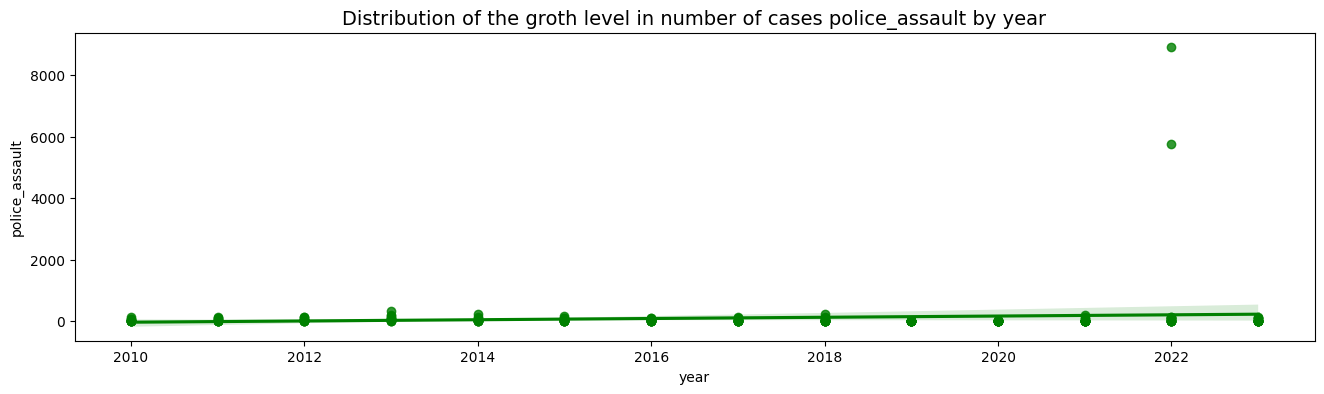

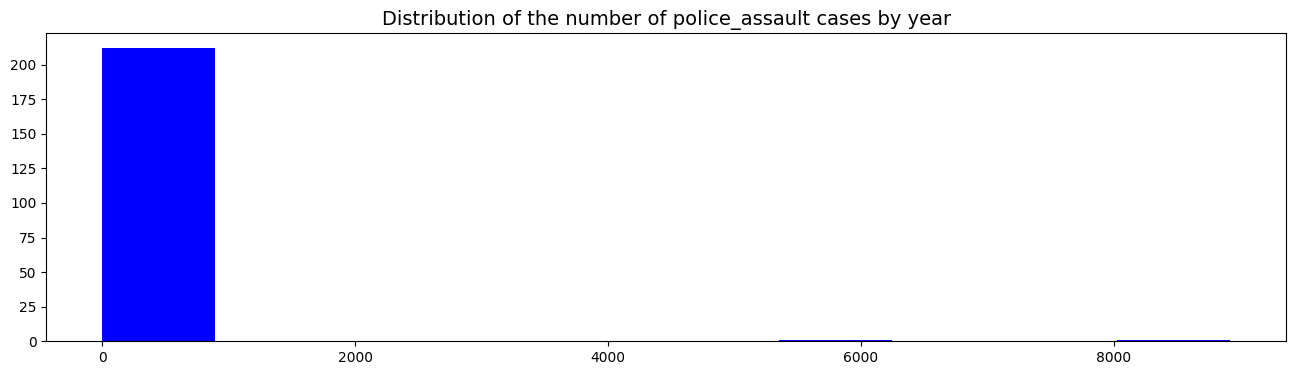

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the groth level in number of cases police_assault by year', fontsize=14)
sns.regplot(x='year', y='police_assault', data=crime_data, color='green')
plt.show()

plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the number of police_assault cases by year', fontsize=14)
plt.hist(crime_data.police_assault, color='blue')
plt.show()

In [ ]:
import plotly.express as px
plot_treemap('police_assault')

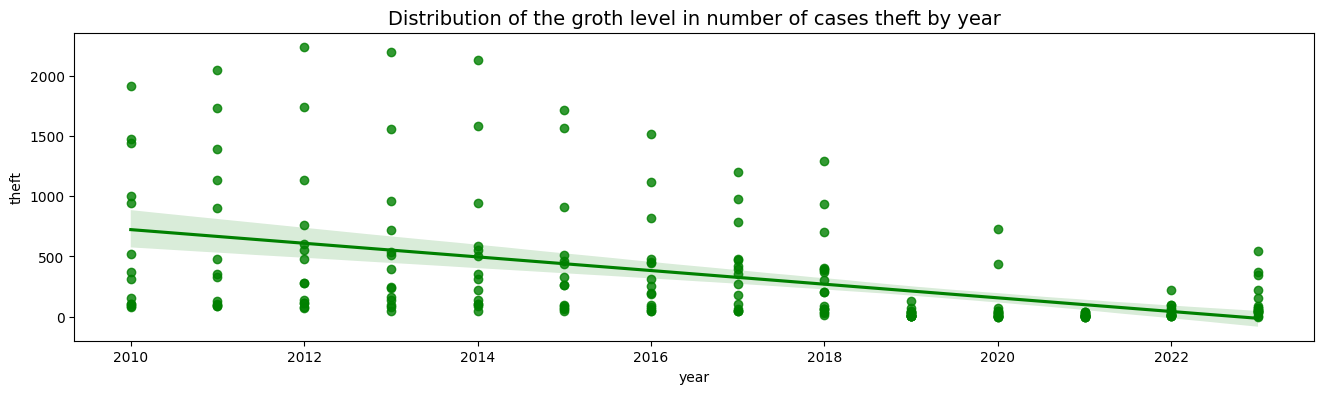

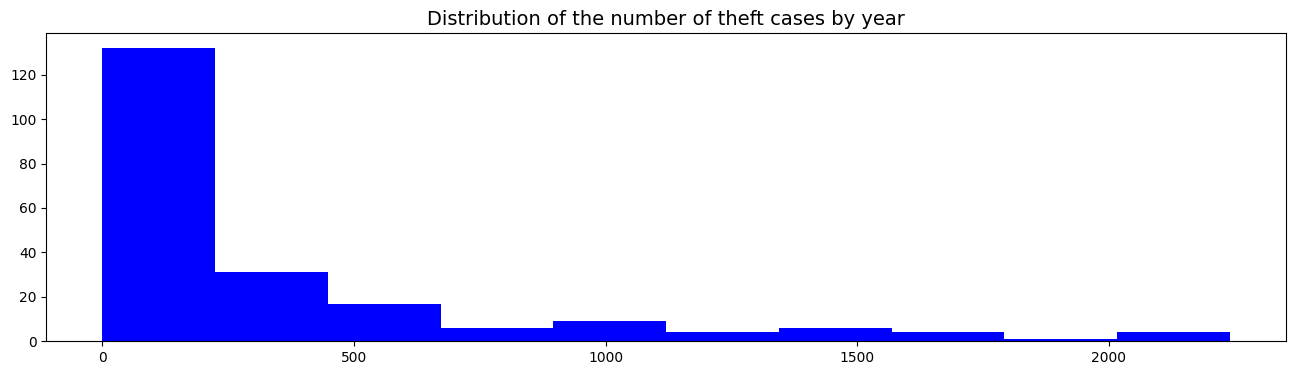

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the groth level in number of cases theft by year', fontsize=14)
sns.regplot(x='year', y='theft', data=crime_data, color='green')
plt.show()

plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the number of theft cases by year', fontsize=14)
plt.hist(crime_data.theft, color='blue')
plt.show()

In [ ]:
import plotly.express as px
plot_treemap('theft')

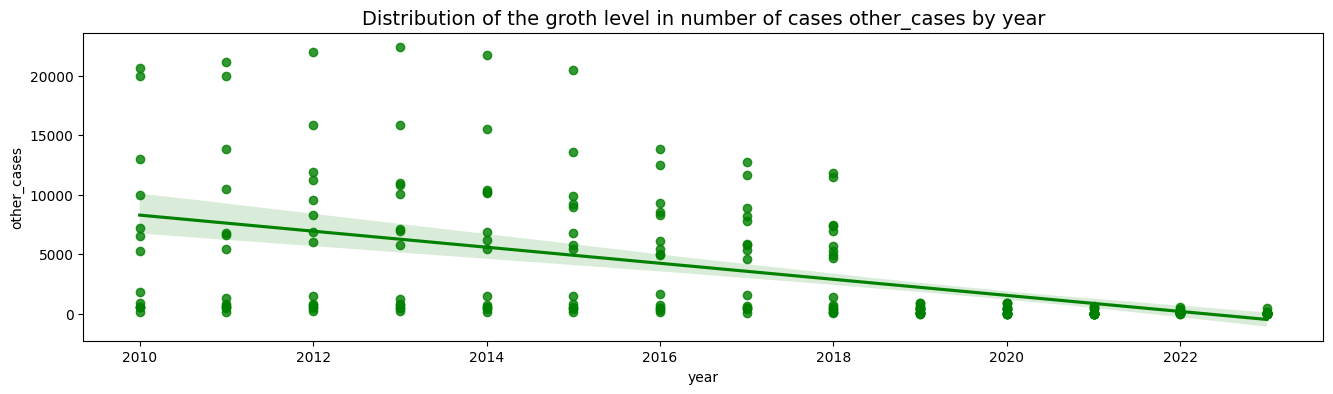

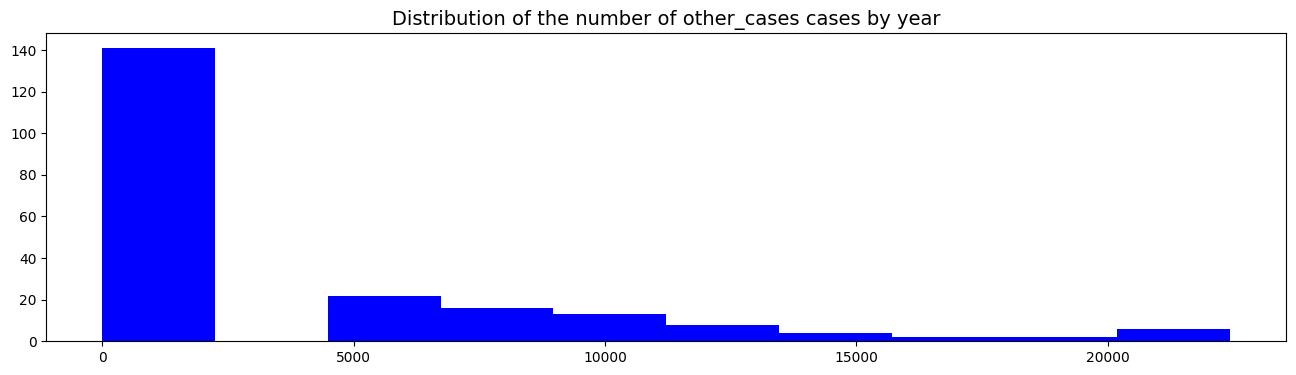

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the groth level in number of cases other_cases by year', fontsize=14)
sns.regplot(x='year', y='other_cases', data=crime_data, color='green')
plt.show()

plt.figure(figsize=(16, 4))
sns.set_palette('pastel')
plt.title('Distribution of the number of other_cases cases by year', fontsize=14)
plt.hist(crime_data.other_cases, color='blue')
plt.show()

In [ ]:
import plotly.express as px
plot_treemap('theft')

In [ ]:
fig = px.box(df, x='year', y='murder', title= 'Distribution of the number of murder cases by year', width=1200, height=600,template='plotly_dark')
fig.show()

In [ ]:
plot_treemap('recovery_cases_narcotics')

In [ ]:
fig = px.scatter(df, x='year', y='recovery_cases_narcotics', color='area_name', marginal_x='histogram', marginal_y='histogram', hover_data=df.columns, title= 'Recovery cases narcotics')
fig.show()

In [ ]:
import plotly.express as px
fig=px.line(crime_data,x='year',y=['recovery_cases_arms_act','recovery_cases_explosive','recovery_cases_narcotics','recovery_cases_smuggling'],template='ggplot2',title='<b>Distribution of: recovery cases arms act,recovery cases explosive, recovery cases narcotics, recovery cases smuggling')
fig=px.pie(names=names,values=values,hole=.7,template='ggplot2')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

In [ ]:
df_copy = df.copy()
df_copy.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_copy.columns:
    if df_copy[i].dtype == 'object':
        df_copy[i] = le.fit_transform(df_copy[i])

In [ ]:
X = df_copy.drop('murder',axis=1)
y = df_copy['murder']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 17), (171,), (43, 17), (43,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.6875,0.384615,0.225610,0.139831,0.342287,0.282416,0.000000,0.063006,0.006941,0.084507,0.196875,0.412814,0.351291,0.224299,0.255577,0.825827,0.555556
1,0.3750,0.769231,0.134146,0.000000,0.017652,0.269982,0.325581,0.000000,0.001562,0.016432,0.000446,0.000000,0.004489,0.009346,0.010052,0.173376,0.444444
2,0.6875,0.538462,0.219512,0.080508,0.282425,0.234458,0.000000,0.038704,0.004859,0.092723,0.209821,0.348522,0.384961,0.096573,0.539503,0.494221,0.555556
3,0.3750,0.615385,0.000000,0.008475,0.019954,0.007105,0.000000,0.002700,0.000868,0.008216,0.014286,0.008159,0.020202,0.023364,0.023278,0.000399,0.000000
4,0.8125,0.461538,0.134146,0.061441,0.000000,0.056838,0.000000,0.024302,0.005032,0.156103,0.202232,0.379999,0.050505,0.015576,0.195089,0.509366,0.555556


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
etree = ExtraTreesRegressor()

In [ ]:
res = pd.DataFrame()
lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
Models = [lr,tree,rf]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))




Model is: LinearRegression()
Training score : 0.6930587409877391
Predictions are : [3604.74907834  504.72942451 2739.13775755  672.5417473   381.1594734
  213.53829645   66.30540332  310.18354482 4550.73561963  346.55719051
 1801.87001945 1913.60052306  359.03511693  366.50904257 1141.67771251
 5706.60788148 3171.65958334  252.19823106  218.72208706 3227.45257812
  987.31890631 1109.62740054 2345.54428884 2168.89388715  186.4605962
  926.46490863  128.23608943 -155.04862003 1314.98092928  165.46968271
 1358.46773169  342.44328597 2016.2556976  1517.82129018 1419.88976397
  882.05582191 3077.90725253  549.75034308 1476.12875939  164.23275688
  246.15564445 1854.37442556 6343.8565672 ]
Model is: DecisionTreeRegressor()
Training score : 1.0
Predictions are : [3.014e+03 4.350e+02 2.359e+03 2.480e+02 1.460e+02 5.000e+00 1.690e+02
 1.120e+02 5.763e+03 9.500e+01 1.120e+02 1.779e+03 2.480e+02 1.650e+02
 3.500e+02 1.000e+02 4.350e+02 1.974e+03 2.350e+02 4.350e+02 4.550e+02
 4.350e+02 2.025e+03 

In [ ]:
etree.fit(X_train,y_train)
y_pred = etree.predict(X_test)

out = pd.DataFrame({'murder_actual':y_test,'murder_pred':y_pred})
result = df_copy.merge(out,left_index=True,right_index=True)
result.head(10)

,area_name,year,dacoity,robbery,woman_child_Repression,speedy_trial,riot,murder,kidnapping,police_assault,burglary,theft,other_cases,recovery_cases_arms_act,recovery_cases_explosive,recovery_cases_narcotics,recovery_cases_smuggling,Cluster,murder_actual,murder_pred
9,7,2010,74.0,125.0,513.0,110.0,15.0,2275.0,156.0,25.0,332.0,947.0,9954.0,211.0,96.0,2292.0,1238.0,5,2275.0,3001.25
15,8,2011,3.0,13.0,23.0,17.0,0.0,171.0,12.0,10.0,57.0,92.0,478.0,14.0,3.0,495.0,9.0,0,171.0,332.39
16,12,2011,2.0,14.0,18.0,3.0,3.0,146.0,16.0,11.0,55.0,101.0,665.0,8.0,1.0,253.0,199.0,0,146.0,363.93
18,16,2011,9.0,24.0,37.0,42.0,1.0,158.0,16.0,16.0,31.0,129.0,857.0,8.0,0.0,178.0,32.0,0,158.0,443.38
25,10,2011,3.0,0.0,21.0,5.0,0.0,8.0,2.0,1.0,1.0,95.0,172.0,3.0,0.0,264.0,115.0,0,8.0,63.83
30,1,2012,8.0,9.0,0.0,7.0,0.0,135.0,5.0,11.0,40.0,75.0,600.0,16.0,0.0,459.0,49.0,0,135.0,198.98
45,16,2013,19.0,29.0,32.0,33.0,2.0,131.0,3.0,30.0,26.0,136.0,739.0,19.0,31.0,194.0,4.0,0,131.0,267.95
55,3,2014,5.0,63.0,120.0,52.0,17.0,387.0,53.0,31.0,97.0,310.0,1457.0,121.0,10.0,2488.0,56.0,0,387.0,1026.87
60,4,2014,184.0,221.0,1395.0,456.0,1.0,4907.0,203.0,127.0,619.0,1582.0,21716.0,331.0,64.0,12175.0,555.0,1,4907.0,4812.68
66,13,2014,21.0,62.0,349.0,88.0,0.0,2573.0,45.0,32.0,126.0,549.0,10181.0,62.0,11.0,1756.0,1332.0,5,2573.0,2598.72


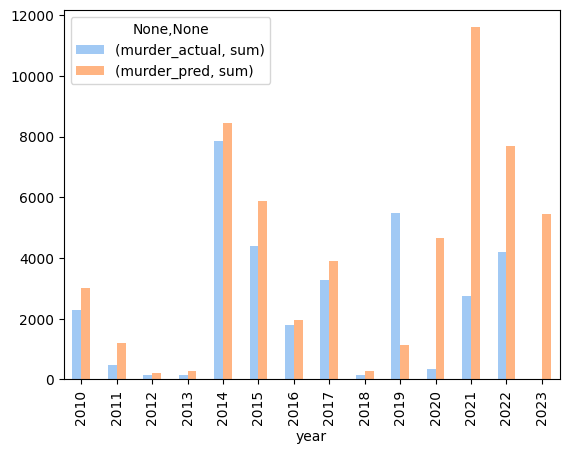

In [ ]:
result.groupby('year')[['murder_actual','murder_pred']].agg(['sum']).plot(kind='bar')
plt.show()